# Content
1. [rawData](#1-rawData)
    - [1.1 Import rawData](#1.1-Import-rawData)
    - [1.2 Data Processing](#1.2-Data-Processing)
    - [1.3 Create Dataset](#1.3-Create-dataset)
2. [Data Visualization](#2.-Data-Visualization)
    - [2.1 Scatter Plot](#2.1-Scatter-Plot)
    - [2.2 Scatter Plot Matrix](#2.2-Scatter-Plot-Matrix)
    - [2.3 Line Chart](#2.3-Line-Chart)
3. [Machine Learning](#3.-ML)
    - [3.1 SVM](#3.1-SVM)
    - [3.2 Train/Test Dataset](#3.2-Train/Test-Dataset)
    - [3.3 Evaluation](#3.3-Evaluation)
    - [3.4 Decision Boundary Visualization](#3.4-Decision-Boundary-Visualization)

## 1 rawData

### 1.1 Import rawData

In [19]:
import pandas as pd
import numpy as np
import glob

In [375]:
# rawData: others 
path = 'rawData/others' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
frame = frame.mask(frame>60000, 0)
frame_others = frame.replace([np.nan], 0)
len(frame_others)

160

In [371]:
# rawData: appleRed
path = 'rawData/appleRed*' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
frame_appleRed = frame.replace(np.nan, 1)
# frame_appleRed

### 1.2 Data Processing

In [372]:
# do median() for frame_others
df_t = pd.concat([frame_others[0:10].median(),frame_others[10:20].median(),frame_others[20:30].median(),
                  frame_others[30:40].median(),frame_others[40:50].median(),frame_others[50:60].median(),
                  frame_others[60:70].median(),frame_others[70:80].median(),frame_others[80:90].median(),
                  frame_others[90:100].median(),frame_others[100:110].median(),frame_others[110:120].median(),
                  frame_others[120:130].median(),frame_others[130:140].median(),frame_others[140:150].median(),
                  frame_others[150:160].median()
                 ], axis=1)
df = df_t.T
df = df.drop('ID',1)
df_others = df.rename(columns={'Weight1':'W1', 'Weight2':'W2', 'Weight3':'W3'})
# df_others.shape #=(16, 10)

In [373]:
# do median() for frame_appleRed
df_t = pd.concat([frame_appleRed[0:10].median(),frame_appleRed[10:20].median(),frame_appleRed[20:30].median(),
                  frame_appleRed[30:40].median(),frame_appleRed[40:50].median(),frame_appleRed[50:60].median(),
                  frame_appleRed[60:70].median(),frame_appleRed[70:80].median(),frame_appleRed[80:90].median(),
                  frame_appleRed[90:100].median(),frame_appleRed[100:110].median(),frame_appleRed[110:120].median(),
                  frame_appleRed[120:130].median(),frame_appleRed[130:140].median(),frame_appleRed[140:150].median(),
                  frame_appleRed[150:160].median(),frame_appleRed[160:170].median(),frame_appleRed[170:180].median(),
                  frame_appleRed[190:200].median(),frame_appleRed[200:210].median(),frame_appleRed[210:220].median(),
                  frame_appleRed[220:230].median(),frame_appleRed[230:240].median(),frame_appleRed[240:250].median(),
                  frame_appleRed[250:260].median(),frame_appleRed[260:270].median(),frame_appleRed[270:280].median(),
                  frame_appleRed[280:290].median(),frame_appleRed[290:300].median(),frame_appleRed[300:310].median()
                 ], axis=1)
df = df_t.T
df = df.drop('ID',1)
df_appleRed = df.rename(columns={'Weight1':'W1', 'Weight2':'W2', 'Weight3':'W3'})
# df_appleRed.shape #=(30, 10)

### 1.3 Create dataset

In [278]:
ds = pd.concat([df_others, df_appleRed], axis=0)
ds.to_csv('fruitDataset.csv'); #print(ds)
# ds.shape

## 2. Data Visualization

### 2.1 Scatter Plot

In [279]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
aaa = pd.melt(ds)
# sns.scatterplot(data=aaa, x="variable", y="value")

<Figure size 648x432 with 0 Axes>

### 2.2 Scatter Plot Matrix

In [280]:
import seaborn as sns
# sns.pairplot(ds)

### 2.3 Line Chart

In [361]:
plt.figure(figsize=(20,10))
x = np.linspace(0,29, 29) #len(x)=29
y = ds.loc[:,'Red':'Pot3'] #len(y)=29
# plt.plot(x,y,'-o')
# plt.show()

<Figure size 1440x720 with 0 Axes>

## 3. Machine Learning

### 3.1 Train/Test Dataset

In [364]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
target_name = 'Fruit'
X = ds.drop('Fruit', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = ds[target_name]
y = y.to_numpy().astype(int) # or # y = y.to_numpy(dtype='int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)

In [365]:
from sklearn import svm
clf = svm.SVC(kernel='linear', gamma='auto', C=2)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

### 3.3 Evaluation

In [366]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import classification_report

In [367]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



Text(0.5, 1.0, 'Confusion matrix for our classifier')

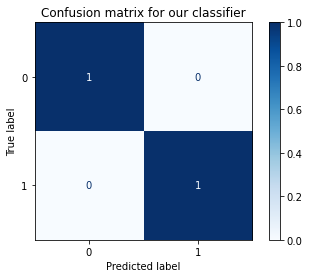

In [368]:
# Generate confusion matrix
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
# plt.show(matrix)
# plt.show()

### 3.4 Visualization

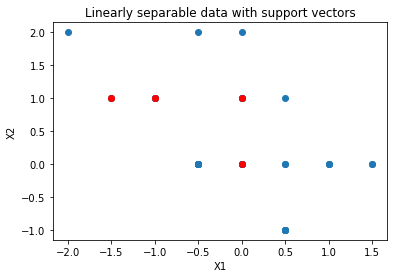

In [369]:
# Get support vectors
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [370]:
# from mlxtend.plotting import plot_decision_regions
# import matplotlib.pyplot as plt
# from sklearn import datasets
# from sklearn.svm import SVC

# # Loading some example data
# iris = datasets.load_iris()
# X = iris.data[:, [0, 2]]
# y = iris.target

# # Training a classifier
# svm = SVC(C=0.5, kernel='linear')
# svm.fit(X, y)


# # Plotting decision regions
# plot_decision_regions(X, y, clf=svm, legend=2)

# # Adding axes annotations
# plt.xlabel('sepal length [cm]')
# plt.ylabel('petal length [cm]')
# plt.title('SVM on Iris')
# plt.show()